In [3]:
# Step 1: Import necessary libraries
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import numpy as np
from streamz import Stream

# Step 2: Function to generate random data points
def generate_random_data(n_points=100, n_dims=2):
    data = [[random.randint(0, 100) for _ in range(n_dims)] for _ in range(n_points)]
    return np.array(data)

# Step 3: Function to perform K-means clustering
def perform_kmeans_clustering(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.labels_, kmeans.cluster_centers_

# Step 4: Create a stream for real-time data processing
stream = Stream()

# Define a function to process a batch of data
def process_batch(data):
    labels, centers = perform_kmeans_clustering(np.array(data))
    print("Cluster labels:", labels)
    print("Cluster centers:", centers)
    return labels, centers

# Accumulate data points in batches of 100 and then process
stream.partition(100).sink(process_batch)

# Step 5: Simulate real-time data stream
for _ in range(1000):  # Simulate 1000 data points
    data_point = [random.randint(0, 100), random.randint(0, 100)]  # Generate a single data point
    stream.emit(data_point)


Cluster labels: [0 2 2 2 0 2 2 2 0 0 1 1 2 2 1 2 2 2 1 1 0 2 2 0 2 2 2 1 1 1 1 0 1 0 2 0 2
 0 1 1 2 0 0 2 2 2 0 2 1 2 2 1 0 1 2 1 0 1 1 1 2 1 1 0 1 1 1 1 1 1 2 2 1 1
 1 1 0 0 1 1 0 1 1 2 2 0 2 2 0 0 1 0 1 1 2 1 2 2 1 2]
Cluster centers: [[71.52173913 19.13043478]
 [19.525      47.875     ]
 [71.10810811 68.08108108]]
Cluster labels: [0 0 1 2 1 0 2 1 1 0 2 0 2 0 0 2 0 2 0 1 0 1 1 1 0 2 0 1 2 2 2 1 0 0 0 2 2
 1 1 2 1 1 0 2 2 2 0 1 2 1 2 0 1 2 2 2 1 1 1 1 2 2 2 1 2 1 1 1 1 2 1 0 1 1
 2 2 1 1 0 2 2 1 1 1 1 0 2 0 2 2 0 2 0 1 0 2 0 1 1 0]
Cluster centers: [[81.51851852 68.        ]
 [55.34210526 17.36842105]
 [25.34285714 64.08571429]]
Cluster labels: [1 0 0 1 1 0 2 1 1 2 0 0 2 0 2 0 2 0 2 1 0 0 0 2 1 0 2 0 2 0 2 2 2 0 0 0 0
 0 1 2 2 2 0 0 0 2 0 1 0 2 1 1 0 1 1 1 2 2 0 1 0 0 0 1 2 0 1 1 1 1 2 2 1 1
 2 0 0 2 1 0 1 2 0 1 0 0 0 2 1 0 0 2 0 1 2 0 0 1 0 2]
Cluster centers: [[50.06976744 20.88372093]
 [19.35714286 79.35714286]
 [75.65517241 70.48275862]]
Cluster labels: [1 1 0 0 0 2 1 1 2 1 2 0 1 

In [1]:
!pip install streamz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 635.5 kB/s eta 0:00:00


In [4]:
import random

def generate_random_data(num_points, lower_bound, upper_bound):
    data = [(random.randint(lower_bound, upper_bound), random.randint(lower_bound, upper_bound)) for _ in range(num_points)]
    return data

# Generate a batch of 100 random data points with values between 0 and 100
batch_data = generate_random_data(100, 0, 100)
batch_data[:10]

[(54, 8),
 (17, 94),
 (66, 10),
 (13, 50),
 (69, 80),
 (90, 58),
 (99, 92),
 (76, 76),
 (42, 40),
 (21, 18)]

In [5]:
from sklearn.cluster import KMeans
import numpy as np

# Convert the batch data to a numpy array
data = np.array(batch_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

cluster_centers, labels[:10]

(array([[72.87878788, 73.06060606],
        [51.31034483, 15.24137931],
        [21.18421053, 65.52631579]]),
 array([1, 2, 1, 2, 0, 0, 0, 0, 1, 1], dtype=int32))

In [6]:
from streamz import Stream
import random
import numpy as np
from sklearn.cluster import KMeans

# Function to generate random data points
def generate_random_data_point(lower_bound, upper_bound):
    return (random.randint(lower_bound, upper_bound), random.randint(lower_bound, upper_bound))

# Function to perform K-means clustering on a batch of data
def perform_kmeans_clustering(data_batch):
    data = np.array(data_batch)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
    return kmeans.cluster_centers_, kmeans.labels_

# Create a Stream
source = Stream()

# Define a function to process the data stream
def process_stream(data_batch):
    cluster_centers, labels = perform_kmeans_clustering(data_batch)
    print("Cluster Centers:", cluster_centers)
    print("Labels:", labels[:10])  # Display the first 10 labels for verification

# Create a stream to batch the data and process it
source.partition(100).sink(process_stream)

# Simulate real-time data streaming
for _ in range(1000):
    source.emit(generate_random_data_point(0, 100))

Cluster Centers: [[25.34285714 33.2       ]
 [81.3030303  32.51515152]
 [54.125      83.125     ]]
Labels: [2 0 0 0 1 1 2 1 2 0]
Cluster Centers: [[15.45454545 50.81818182]
 [66.14285714 24.07142857]
 [67.38461538 76.17948718]]
Labels: [2 2 0 1 0 0 0 2 2 2]
Cluster Centers: [[21.33333333 74.55555556]
 [35.12       13.16      ]
 [80.82051282 55.38461538]]
Labels: [1 1 0 1 0 0 2 1 1 0]
Cluster Centers: [[71.10526316 73.34210526]
 [63.8        20.125     ]
 [11.         55.63636364]]
Labels: [2 0 0 1 1 1 2 0 0 0]
Cluster Centers: [[77.71875    67.25      ]
 [49.76744186 20.90697674]
 [27.04       81.64      ]]
Labels: [2 0 2 0 2 2 0 1 0 0]
Cluster Centers: [[76.8        70.6       ]
 [22.6        67.74285714]
 [45.375      19.675     ]]
Labels: [2 0 0 2 1 2 2 2 0 1]
Cluster Centers: [[77.09375    32.09375   ]
 [47.07692308 80.41025641]
 [24.55172414 29.5862069 ]]
Labels: [1 2 0 2 2 0 0 0 1 1]
Cluster Centers: [[20.18518519 79.25925926]
 [46.11627907 29.30232558]
 [78.83333333 77.66666667]

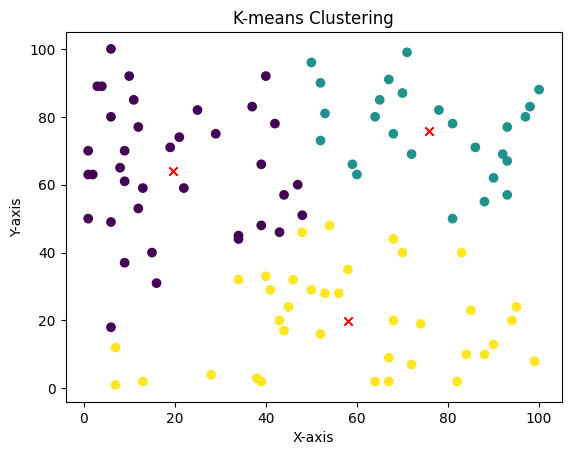

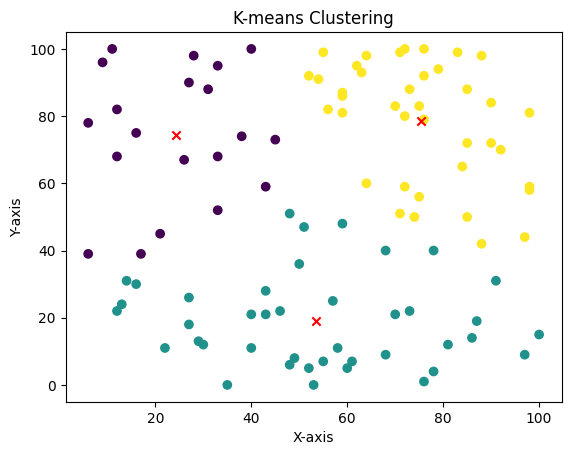

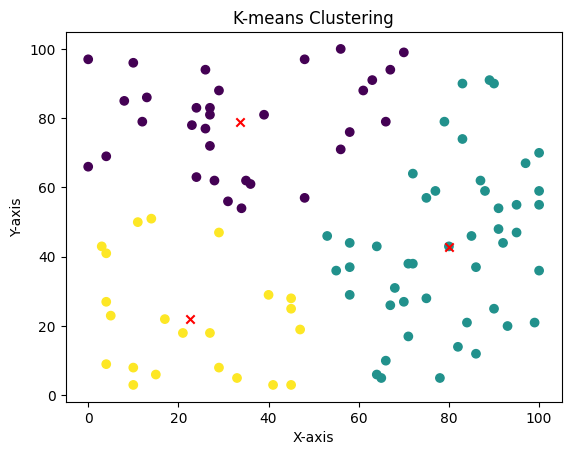

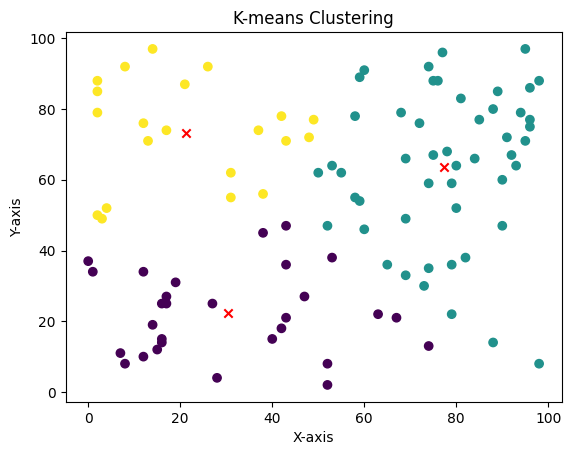

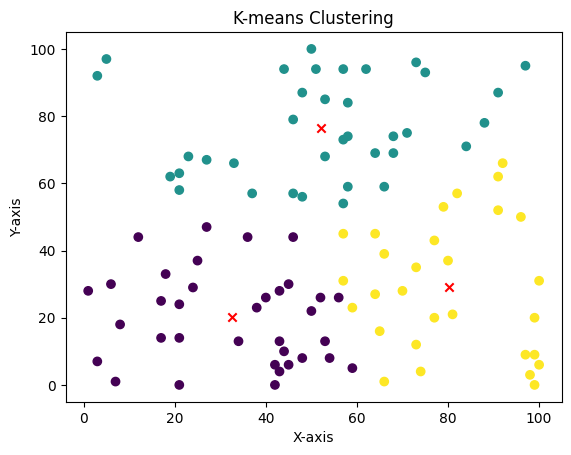

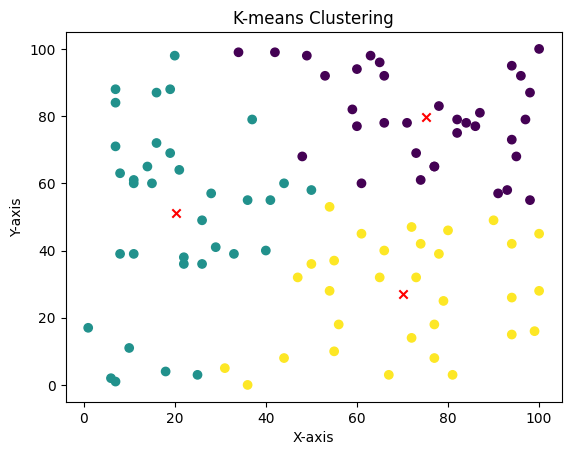

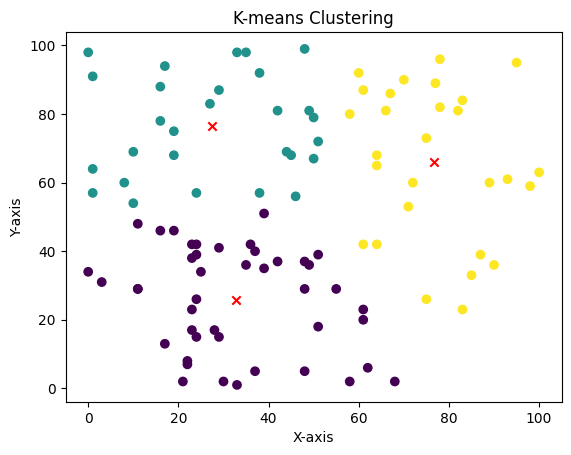

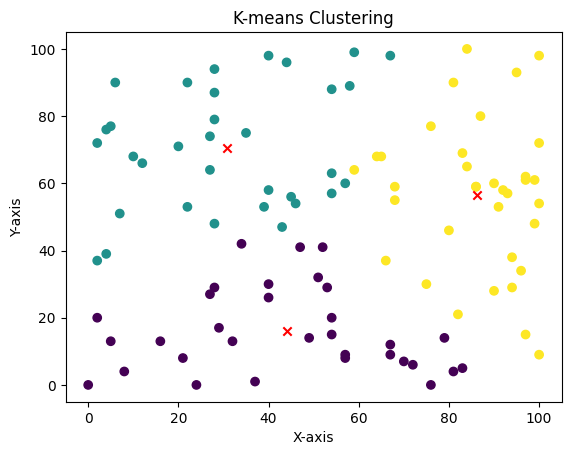

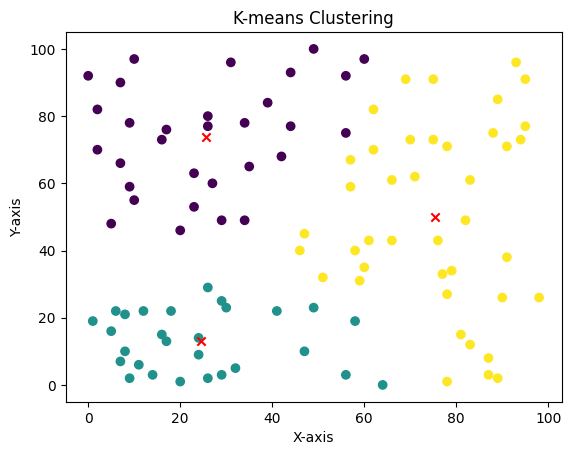

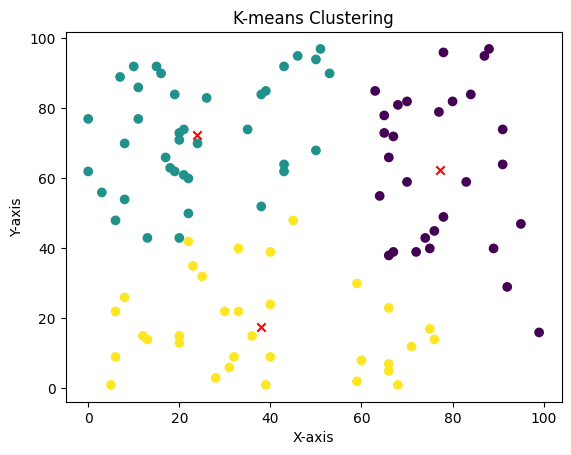

In [7]:
import random
import numpy as np
from sklearn.cluster import KMeans
from streamz import Stream
import matplotlib.pyplot as plt

# Function to generate random data points
def generate_random_data_point(lower_bound, upper_bound):
    return (random.randint(lower_bound, upper_bound), random.randint(lower_bound, upper_bound))

# Function to perform K-means clustering on a batch of data
def perform_kmeans_clustering(data_batch):
    data = np.array(data_batch)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
    return kmeans.cluster_centers_, kmeans.labels_

# Function to visualize the clustered points
def visualize_clusters(data_batch, cluster_centers, labels):
    data = np.array(data_batch)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
    plt.title('K-means Clustering')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# Create a Stream
source = Stream()

# Define a function to process the data stream
def process_stream(data_batch):
    cluster_centers, labels = perform_kmeans_clustering(data_batch)
    visualize_clusters(data_batch, cluster_centers, labels)

# Create a stream to batch the data and process it
source.partition(100).sink(process_stream)

# Simulate real-time data streaming
for _ in range(1000):
    source.emit(generate_random_data_point(0, 100))